In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
path = Path(Config.get_key('data_path')).expanduser()/'handwritten'
#bs = 4096
#tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, train='Train', valid='Validation', ds_tfms=tfms, size=32, bs=bs)
#learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [3]:
classes = ['#', '$', '&', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [4]:
#empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms()).normalize(imagenet_stats)
empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms())
learn = create_cnn(empty_data, models.resnet34)
# The model was created as DataParallel, therefore we need to load it as DataParallel for inference.
learn.model = torch.nn.DataParallel(learn.model)

In [5]:
learn.path = Path('.')
learn.load('stage-2-resnet34-32px')

In [6]:
img_folder = path/'Validation/J'
img_path = path/'Validation/J/50.jpg'
#img_folder.ls()

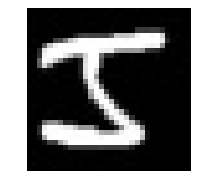

In [7]:
#img = open_image(data.train_ds.x[50000])
img = open_image(img_path)
img.show()

In [8]:
learn.predict(img)

('J',
 tensor(23),
 tensor([7.3875e-02, 3.8184e-01, 1.2064e-01, 1.8829e-02, 4.5135e+01, 1.3159e+00,
         2.2532e+00, 3.5167e-03, 5.2337e+03, 1.2280e-01, 1.4935e-01, 1.7468e-01,
         7.8048e-04, 7.6714e-02, 1.0882e-03, 4.9951e+00, 2.1151e-01, 2.4137e+00,
         7.2458e+00, 2.0913e+01, 6.2811e-02, 2.5599e-02, 7.1250e+03, 6.1568e+05,
         1.2470e+00, 3.3651e+01, 1.7764e-02, 1.7493e-02, 2.2698e-02, 5.5340e-03,
         2.6134e+00, 2.5987e+00, 3.6984e+02, 2.7769e-01, 1.8690e-01, 7.1974e-03,
         2.2318e-01, 1.9894e-01, 5.9458e+00]))

In [9]:
#! wget http://yourstorage.blob.core.windows.net/ficheros/e.png

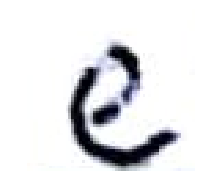

In [10]:
img = open_image("e.png")
img.show()

In [11]:
learn.predict(img)

('E',
 tensor(18),
 tensor([3.6386e+00, 1.6400e+00, 2.5162e-01, 9.4365e-01, 3.8610e-01, 4.6063e+00,
         2.2263e+00, 1.5297e+00, 2.2841e-02, 1.3320e-01, 2.1119e+01, 5.0088e-02,
         2.4759e-01, 3.4886e-02, 6.3916e+00, 7.3167e-01, 1.3503e+00, 1.4749e+01,
         5.9344e+02, 6.6867e+00, 1.7525e-01, 1.0570e-02, 1.8196e+00, 4.3867e+00,
         1.0645e-01, 5.1422e-01, 1.2771e+00, 2.7306e+01, 5.1395e+01, 1.6666e+00,
         1.3637e+01, 1.6401e+00, 1.4222e+02, 1.3468e+00, 1.6043e+00, 6.1262e+00,
         4.7501e-01, 2.8776e-02, 4.0821e+01]))

In [12]:
#! rm 4.png*
#! wget http://yourstorage.blob.core.windows.net/ficheros/4.png

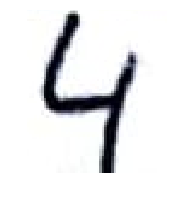

In [13]:
img = open_image("4.png")
img.show()

In [14]:
learn.predict(img)

('A',
 tensor(14),
 tensor([4.3342e+00, 4.1307e-01, 3.2498e-02, 9.9408e-02, 1.9466e+00, 1.7863e+01,
         4.6578e-01, 1.1375e-01, 1.4924e+00, 1.0553e+00, 3.1489e-02, 6.0895e-02,
         3.9846e-03, 3.2297e-02, 1.2900e+02, 4.2046e+01, 7.8677e-02, 5.2793e+01,
         1.9115e+00, 5.7047e-02, 3.9228e-01, 2.4431e+00, 1.2162e+00, 5.3275e+01,
         5.9486e-02, 3.2763e+00, 2.8085e+00, 9.7070e+00, 2.3352e-01, 1.7009e-02,
         9.2983e+00, 3.3875e+01, 3.5483e-02, 1.1104e+00, 2.9345e-01, 6.3530e-01,
         8.6206e-01, 5.8393e-02, 1.8066e+00]))

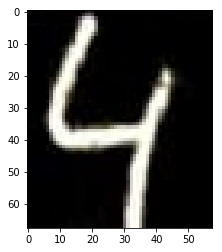

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('4.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [16]:
cv2.imwrite('4invert.png',img)

True

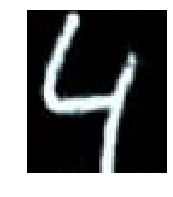

In [17]:
img = open_image("4invert.png")
img.show()

In [18]:
learn.predict(img)

('#',
 tensor(0),
 tensor([2.3041e+05, 1.9771e+01, 5.9362e-04, 9.0081e-06, 4.8550e-02, 8.7049e+01,
         5.7090e-01, 7.3029e-02, 9.8995e-03, 1.2363e+00, 1.2090e+00, 4.2477e-09,
         2.4246e-04, 2.6890e+02, 3.3473e+01, 2.6917e+01, 2.5073e-04, 1.3536e+00,
         4.8122e+00, 4.1500e-04, 4.3830e-03, 2.4442e-01, 2.2846e-01, 1.5421e+04,
         6.7920e-03, 1.0825e-02, 8.9473e+04, 3.3617e+02, 1.3749e+02, 2.2891e-04,
         5.6644e+04, 8.2494e-03, 5.6983e-06, 8.1387e+00, 8.6351e+00, 5.2690e+03,
         9.8112e-04, 1.7004e-04, 4.8900e-02]))